In [45]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from os import walk

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

root_dir = "./data/"

plt.style.use("seaborn-whitegrid")
plt.rc("font", family = "AppleGothic")
sns.set(
    font="AppleGothic", 
    rc={"axes.unicode_minus":False}, style='darkgrid'
)

In [2]:
list_files = []
for (dirpath, dirnames, filenames) in walk(root_dir):
    list_files.extend(filenames)
    break
    
list_df = []
for csv_file in list_files:
    list_df.append(pd.read_csv(f"{root_dir}{csv_file}", encoding="utf-8-sig"))
    
df_base = pd.concat(list_df)

In [3]:
df_kodex = df_base[(df_base["CD"] == "A122630") & (df_base["CVOL"] > 0)]
df_kodex.head()

,DT,DIV,CD,NM,TIMES,CPRICE,DIFF,CVOL,VOL
22,2022-04-12,실시간(장중 체결),A122630,KODEX 레버리지,90151,19065,-235,200,315878
35,2022-04-12,실시간(장중 체결),A122630,KODEX 레버리지,90151,19055,-245,200,316078
39,2022-04-12,실시간(장중 체결),A122630,KODEX 레버리지,90151,19060,-240,47,316125
63,2022-04-12,실시간(장중 체결),A122630,KODEX 레버리지,90152,19060,-240,1,316126
86,2022-04-12,실시간(장중 체결),A122630,KODEX 레버리지,90153,19060,-240,50,316176


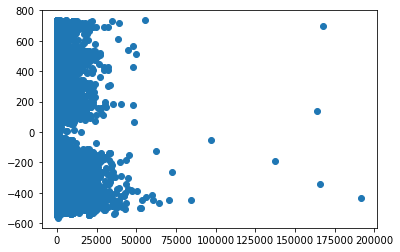

In [55]:
diff = np.array(df_kodex["DIFF"])
times = np.array(df_kodex["CVOL"])

plt.scatter(times, diff)
plt.show()

-0.0007129246784136357 -145.98964949440014 -0.006131914256949432 0.06862812274534492 0.00039152703046053315


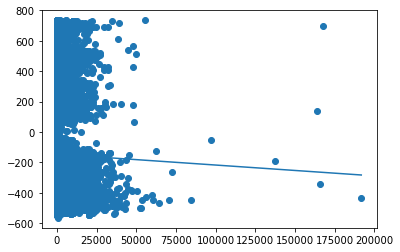

In [56]:
# Execute a method that returns some important key values of Linear Regression:
slope, intercept, r, p, std_err = stats.linregress(times, diff)
# The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.
# 'r'값은 0이면 관계가 없고 -1 또는 1이면 100% 관계가 있다는 것을 의미. 그러므로 '0.76'은 관계는 있지만 완벽하지는 않음을 의미한다.
print(slope, intercept, r, p, std_err)

# Create a function that uses the slope and intercept values to return a new value.
# This new value represents where on the y-axis the corresponding x value will be placed:
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, times))

plt.scatter(times, diff)
plt.plot(times, mymodel)
plt.show()

In [17]:
# 10년된 차의 속도를 예측한다.
speed = myfunc(120000)

print(speed)

-418.40173687354184


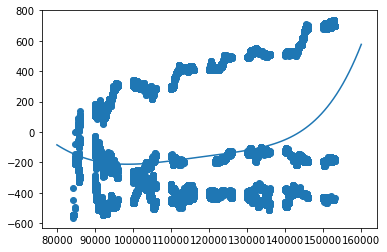

In [52]:
# 주어진 데이터에 곡선을 맞춤 표시
mymodel = np.poly1d(np.polyfit(CVOL, diff, 5))
# Then specify how the line will display, we start at position 1, and end at position 22:
myline = np.linspace(80000, 160000, 100)
# print(myline)

plt.scatter(times, diff)
plt.plot(myline, mymodel(myline))
plt.show()

In [35]:
mymodel(120000)

-392.05362877875086

In [55]:
df_last = df_kodex[df_kodex["DT"] == "2022-04-14"]
df_last.head()

,DT,DIV,CD,NM,TIMES,CPRICE,DIFF,CVOL,VOL
23,2022-04-14,실시간(예상 체결),A122630,KODEX 레버리지,85237,19485,-150,9,55945
72,2022-04-14,실시간(예상 체결),A122630,KODEX 레버리지,85309,19490,-145,1,55946
74,2022-04-14,실시간(예상 체결),A122630,KODEX 레버리지,85311,19485,-150,24,55970
78,2022-04-14,실시간(예상 체결),A122630,KODEX 레버리지,85313,19455,-180,838,56803
93,2022-04-14,실시간(예상 체결),A122630,KODEX 레버리지,85318,19460,-175,2,56805


In [56]:
df_last["PRC_DIFF"] = df_last["CPRICE"].diff()
df_last = df_last.sort_values(by=["TIMES"], ascending=True)
df_last.head()

/var/folders/l2/31k7fcdd2xb41np3rpzw20lh0000gn/T/ipykernel_2705/3945614100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["PRC_DIFF"] = df_last["CPRICE"].diff()


,DT,DIV,CD,NM,TIMES,CPRICE,DIFF,CVOL,VOL,PRC_DIFF
23,2022-04-14,실시간(예상 체결),A122630,KODEX 레버리지,85237,19485,-150,9,55945,NaN
72,2022-04-14,실시간(예상 체결),A122630,KODEX 레버리지,85309,19490,-145,1,55946,5.0
74,2022-04-14,실시간(예상 체결),A122630,KODEX 레버리지,85311,19485,-150,24,55970,-5.0
78,2022-04-14,실시간(예상 체결),A122630,KODEX 레버리지,85313,19455,-180,838,56803,-30.0
93,2022-04-14,실시간(예상 체결),A122630,KODEX 레버리지,85318,19460,-175,2,56805,5.0


In [57]:
list_diff = np.array(df_last[df_last["PRC_DIFF"] !=0]["PRC_DIFF"])[1:]
list_diff[:30]

array([   5.,   -5.,  -30.,    5.,  -10.,  130.,   60., -190.,    5.,
         -5.,    5.,    5.,    5.,   20.,  -20.,    5.,   -5.,    5.,
          5.,   10.,   10.,    5.,   30.,    5.,   15.,   40.,  -15.,
          5.,  -20.,   20.])

In [58]:
# 4틱 두번 상승 후 또는 7틱 연속 상승 후 매수? 이후 계속 하락이면?
list_continue_up = []
list_temp_up = []
continue_up_cnt = 0
up_cnt = 0
base_price = 19485
buy_tf = True

for num in list_diff:
    base_price += num
    if num > 0:
        up_cnt += 1
        list_temp_up.append(num)
    else:
        up_cnt = 0
        if len(list_temp_up) > 4:
            list_continue_up.append(list_temp_up)
        list_temp_up = []
        continue_up_cnt = 0
        
    if up_cnt == 4:
        continue_up_cnt += 1
    elif up_cnt == 7:
        continue_up_cnt = 2
        
    if continue_up_cnt == 2:
        print("Buy!!", base_price)
        continue_up_cnt = 0
        
list_continue_up

Buy!! 19535.0


[[5.0, 5.0, 10.0, 10.0, 5.0, 30.0, 5.0, 15.0, 40.0],
 [5.0, 10.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0]]

In [59]:
#5틱 두번 하락 후 또는 12틱 연속 하락 후 매수? 이후 계속 하락하면?
list_continue_down = []
list_temp_down = []
continue_down_cnt = 0
down_cnt = 0
base_price = 19485
buy_tf = True

for num in list_diff:
    base_price += num
    if num < 0:
        down_cnt += 1
        list_temp_down.append(num)
    else:
        down_cnt = 0
        if len(list_temp_down) > 4:
            list_continue_down.append(list_temp_down)
        list_temp_down = []
        continue_down_cnt = 0
        
    if down_cnt == 6:
        continue_down_cnt += 1
    elif down_cnt == 11:
        continue_down_cnt = 2
        
    if continue_down_cnt == 2:
        print("Buy!!", base_price)
        continue_down_cnt = 0
        
list_continue_down

[[-10.0, -5.0, -5.0, -5.0, -5.0, -5.0],
 [-5.0, -5.0, -5.0, -5.0, -5.0],
 [-5.0, -5.0, -5.0, -10.0, -5.0],
 [-5.0, -5.0, -5.0, -5.0, -5.0],
 [-5.0, -5.0, -5.0, -5.0, -5.0],
 [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0],
 [-5.0, -5.0, -5.0, -5.0, -5.0]]

<AxesSubplot:xlabel='TIMES'>

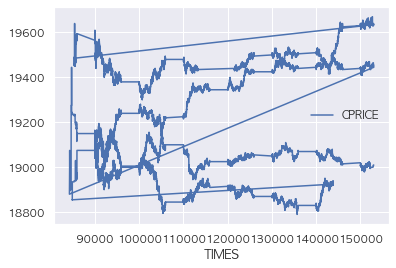

In [60]:
df_kodex.plot(x="TIMES", y=["CPRICE"])